In [1]:
# 1. Extract Data
# 2. 


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
EXTRACTED_DATA_DIR = '/Users/norbertnowak/workspace/pycharm/EPIK_Solution/all_data/extracted/'

In [35]:
sq_df = pd.read_csv(EXTRACTED_DATA_DIR + 'extracted_adsTransformSQ_2016_11.csv')
#categories = pd.read_csv(EXTRACTED_DATA_DIR + 'categories.csv')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


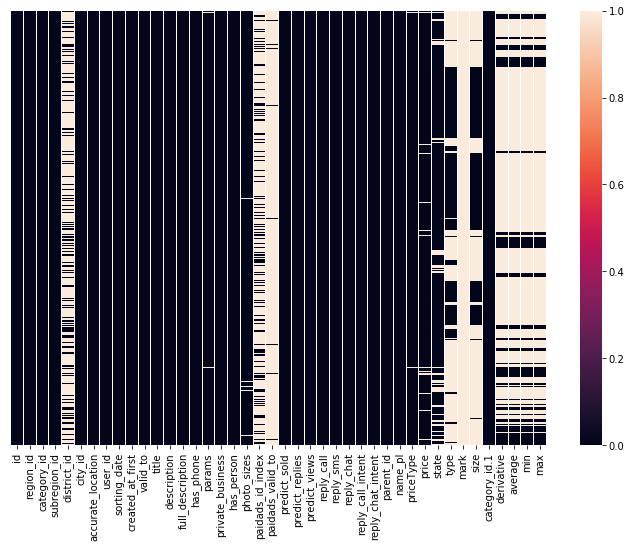

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(sq_df.isnull(), yticklabels=False)

In [54]:
sq_df1 = pd.read_csv(EXTRACTED_DATA_DIR + 'extracted_adsTransformSQ_2016_12.csv')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
pd.options.display.max_rows = 1000
sq_df1.head()

,id,region_id,category_id,subregion_id,district_id,city_id,accurate_location,user_id,sorting_date,created_at_first,...,price,state,type,mark,size,category_id.1,derivative,average,min,max
0,471113355,3,279,303,385.0,1721963681,0,2052953831,2016-11-28,2012-07-04 09:18:13,...,940.0,new,NaN,NaN,NaN,279,63.437363,547.0,2.0,1787.0
1,144496390,1,279,190,NaN,1640171958,0,1447566944,2016-11-26,2012-07-06 11:30:25,...,950.0,new,NaN,NaN,NaN,279,63.437363,547.0,2.0,1787.0
2,1499520116,4,279,102,273.0,239224901,0,1029350709,2016-11-25,2012-07-06 13:20:34,...,1599.0,new,NaN,NaN,NaN,279,63.437363,547.0,2.0,1787.0
3,1771070936,2,279,204,NaN,978427638,0,2102510464,2016-11-13,2012-06-29 07:33:09,...,630.0,new,NaN,NaN,NaN,279,63.437363,547.0,2.0,1787.0
4,1903540578,6,279,74,NaN,1547868440,0,2126092296,2016-11-17,2012-07-09 06:26:42,...,22.0,new,NaN,NaN,NaN,279,63.437363,547.0,2.0,1787.0


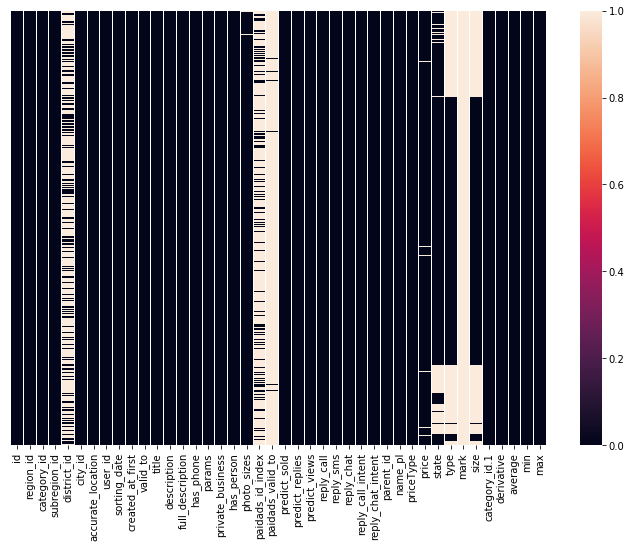

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(sq_df1.isnull(), yticklabels=False)

In [15]:
pd.set_option("display.max_columns",101)

In [32]:
print(sq_df1)

None


In [53]:
sq_df1.head()

,predict_replies,predict_views,price,derivative,average,min,max,f,t,business,private,f,t,arranged,exchange,free,price,new,used
0,0,19,940.0,63.437363,547.0,2.0,1787.0,0,1,1,0,1,0,0,0,0,1,1,0
1,0,13,950.0,63.437363,547.0,2.0,1787.0,0,1,0,1,1,0,1,0,0,0,1,0
2,0,16,1599.0,63.437363,547.0,2.0,1787.0,0,1,1,0,1,0,0,0,0,1,1,0
3,1,53,630.0,63.437363,547.0,2.0,1787.0,0,1,1,0,1,0,0,0,0,1,1,0
4,0,11,22.0,63.437363,547.0,2.0,1787.0,0,1,0,1,1,0,1,0,0,0,1,0


In [20]:
sq_df1 = pd.concat([sq_df1, pd.get_dummies(sq_df1['priceType'])], axis=1)
sq_df1 = sq_df1(['priceType'])

In [50]:
sq_df1 = dropColumnsNotIn(sq_df1, ['id', 'has_phone', 'private_business', 'predict_sold', 'predict_replies', 'predict_views', 'priceType', 'price', 'state', 'derivative', 'average', 'min', 'max'])

In [52]:
sq_df1 = replaceDummies(sq_df1, ['has_phone', 'private_business', 'priceType', 'state'])

In [48]:
#should we dropFirst when gettin dummies
def replaceDummies(df, columns):
    for c in columns:
        df = pd.concat([df, pd.get_dummies(df[c])], axis=1)
        df.drop([c], axis=1, inplace=True)
    return df

In [47]:
def dropColumnsNotIn(df, columns):
    for c in df.keys():
        if c not in columns:
             df.drop([c], axis=1, inplace=True)
    return df

In [ ]:
#has_phone, bussiness, predict_sold, predict_replies, predict_views, priceType, price, state, derivative, average, min, max



In [55]:
print(sq_df1.keys())

Index(['id', 'region_id', 'category_id', 'subregion_id', 'district_id',
       'city_id', 'accurate_location', 'user_id', 'sorting_date',
       'created_at_first', 'valid_to', 'title', 'description',
       'full_description', 'has_phone', 'params', 'private_business',
       'has_person', 'photo_sizes', 'paidads_id_index', 'paidads_valid_to',
       'predict_sold', 'predict_replies', 'predict_views', 'reply_call',
       'reply_sms', 'reply_chat', 'reply_call_intent', 'reply_chat_intent',
       'parent_id', 'name_pl', 'priceType', 'price', 'state', 'type', 'mark',
       'size', 'category_id.1', 'derivative', 'average', 'min', 'max'],
      dtype='object')


In [69]:
sq_df2 = pd.read_csv(EXTRACTED_DATA_DIR + 'extracted_final_2016_12.csv')

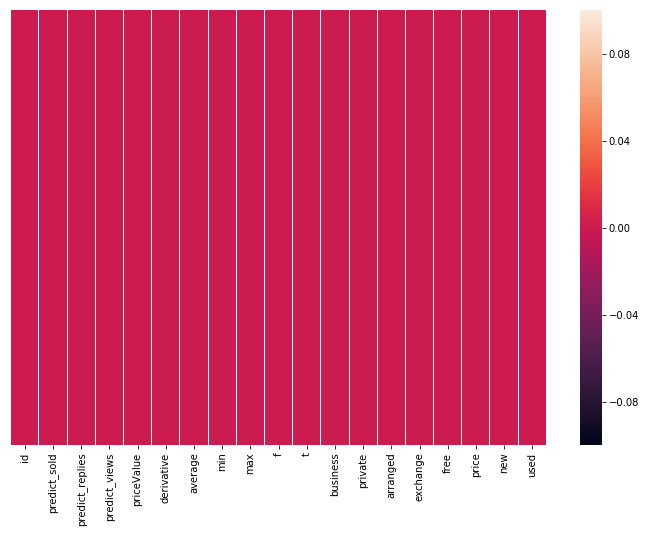

In [70]:
plt.figure(figsize=(12,8))
sns.heatmap(sq_df2.isnull(), yticklabels=False)

In [71]:
sq_df2.head()

,id,predict_sold,predict_replies,predict_views,priceValue,derivative,average,min,max,f,t,business,private,arranged,exchange,free,price,new,used
0,471113355,f,0,19,940.0,63.437363,547.0,2.0,1787.0,0,1,1,0,0,0,0,1,1,0
1,144496390,f,0,13,950.0,63.437363,547.0,2.0,1787.0,0,1,0,1,1,0,0,0,1,0
2,1499520116,f,0,16,1599.0,63.437363,547.0,2.0,1787.0,0,1,1,0,0,0,0,1,1,0
3,1771070936,f,1,53,630.0,63.437363,547.0,2.0,1787.0,0,1,1,0,0,0,0,1,1,0
4,1903540578,f,0,11,22.0,63.437363,547.0,2.0,1787.0,0,1,0,1,1,0,0,0,1,0


In [72]:
sq_df3 = pd.read_csv(EXTRACTED_DATA_DIR + 'extracted_final_2016_11.csv')

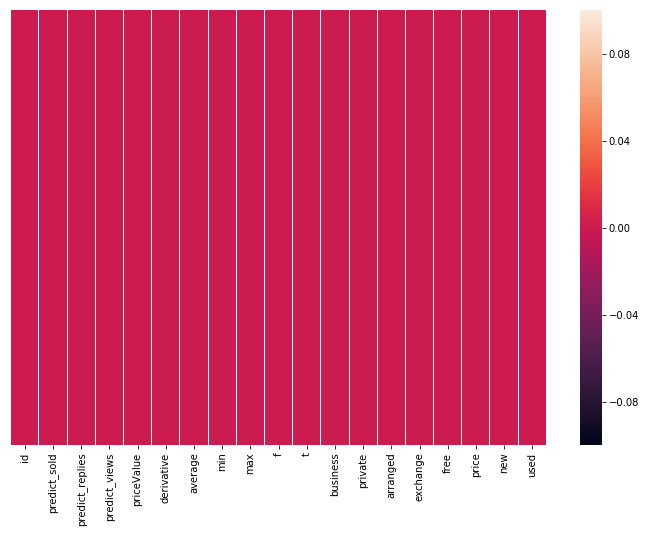

In [73]:
plt.figure(figsize=(12,8))
sns.heatmap(sq_df3.isnull(), yticklabels=False)